<a href="https://colab.research.google.com/github/arifadli/kuliahAI2021/blob/main/Logika%20Fuzzy/Model_Tsukamoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [16]:
# Definisi Rentang
x_beban = np.arange(0, 110, 1)
x_baterai = np.arange(0, 110, 1)
x_motor  = np.arange(0, 120, 1)

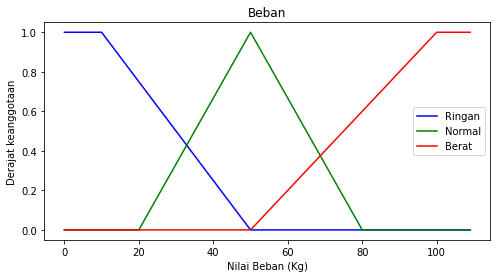

In [11]:
#membuat fungsi keanggotaan
#dari Beban
beban_ringan = fuzz.trapmf(x_beban, [0, 0, 10, 50])
beban_normal = fuzz.trimf(x_beban, [20, 50, 80])
beban_berat = fuzz.trapmf(x_beban, [50, 100, 110, 110])

fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
ax.plot(x_beban, beban_ringan, 'b', linewidth=1.5, label='Ringan')
ax.plot(x_beban, beban_normal, 'g', linewidth=1.5, label='Normal')
ax.plot(x_beban, beban_berat, 'r', linewidth=1.5, label='Berat')
ax.set_title('Beban')
ax.set_xlabel('Nilai Beban (Kg)')
ax.set_ylabel('Derajat keanggotaan')
ax.legend()

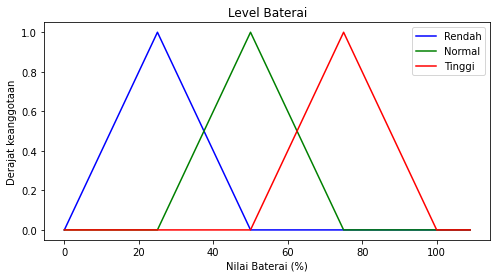

In [12]:
#membuat fungsi keanggotaan
#dari Level Baterai
baterai_rd = fuzz.trimf(x_baterai, [0, 25, 50])
baterai_nm = fuzz.trimf(x_baterai, [25, 50, 75])
baterai_tg = fuzz.trimf(x_baterai, [50, 75, 100])

fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
ax.plot(x_baterai, baterai_rd, 'b', linewidth=1.5, label='Rendah')
ax.plot(x_baterai, baterai_nm, 'g', linewidth=1.5, label='Normal')
ax.plot(x_baterai, baterai_tg, 'r', linewidth=1.5, label='Tinggi')
ax.set_title('Level Baterai')
ax.set_xlabel('Nilai Baterai (%)')
ax.set_ylabel('Derajat keanggotaan')
ax.legend()

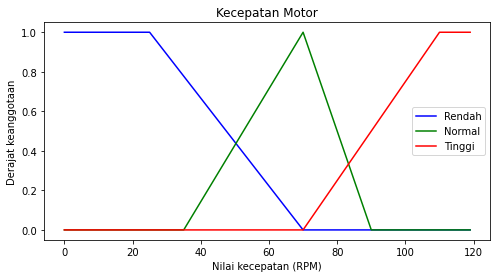

In [13]:
#membuat fungsi keanggotaan
#dari kecepatan motor
motor_rd = fuzz.trapmf(x_motor, [0, 0, 25, 70])
motor_nm = fuzz.trimf(x_motor, [35, 70, 90])
motor_tg = fuzz.trapmf(x_motor, [70, 110, 120, 120])

fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
ax.plot(x_motor, motor_rd, 'b', linewidth=1.5, label='Rendah')
ax.plot(x_motor, motor_nm, 'g', linewidth=1.5, label='Normal')
ax.plot(x_motor, motor_tg, 'r', linewidth=1.5, label='Tinggi')
ax.set_title('Kecepatan Motor')
ax.set_xlabel('Nilai kecepatan (RPM)')
ax.set_ylabel('Derajat keanggotaan')
ax.legend()

In [14]:
##  Crisp Input
beban = 55
baterai = 40

In [18]:
## Fuzzyfication #Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_beban, beban_ringan, beban))
in1.append(fuzz.interp_membership(x_beban, beban_normal, beban))
in1.append(fuzz.interp_membership(x_beban, beban_berat, beban))
in2 = []
in2.append(fuzz.interp_membership(x_baterai, baterai_rd, baterai))
in2.append(fuzz.interp_membership(x_baterai, baterai_nm, baterai))
in2.append(fuzz.interp_membership(x_baterai, baterai_tg, baterai))
print("Derajat Keanggotaan Beban")
if in1[0]>0 :
    print("Ringan : "+str(in2[0]))
if in1[1]>0 :
    print("Normal  : "+str(in2[1]))
if in1[2]>0 :
    print("Berat  : "+str(in2[2]))
print("")
print("Derajat Kranggotaan Baterai")
if in2[0]>0 :
    print("Rendah : "+str(in1[0]))
if in2[1]>0 :
    print("Normal  : "+str(in1[1]))
if in2[2]>0 :
    print("Tinggi  : "+str(in1[2]))

Derajat Keanggotaan Beban
Normal  : 0.6

Derajat Kranggotaan Baterai
Rendah : 0.0
Normal  : 1.0


In [19]:
## Rules and Inferences Tsukamoto
# krg = 7000 - (active_rule3)*5000
# tbh = 5000*deg + 2000

apred1  = np.fmin(in1[1], in2[1])
z1      = 5000*apred1 + 2000

apred2  = np.fmin(in1[0], in2[0])
z2      = 7000-(apred2)*5000

apred3  = np.fmin(in1[0], in2[1])
z3      = 7000-(apred3)*5000

apred4  = np.fmin(in1[1], in2[0])
z4      = 5000*apred4 + 2000

apred4  = np.fmin(in1[1], in2[2])
z5      = 5000*apred4 + 2000

apred4  = np.fmin(in1[0], in2[2])
z6      = 5000*apred4 + 2000

apred4  = np.fmin(in1[2], in2[0])
z7      = 5000*apred4 + 2000

apred4  = np.fmin(in1[2], in2[1])
z8      = 5000*apred4 + 2000

apred4  = np.fmin(in1[2], in2[2])
z9      = 5000*apred4 + 2000

apred4  = np.fmin(in1[1], in2[0])
z4      = 5000*apred4 + 2000

print(z1,z2,z3,z4)
## Defazzyfication
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)
print("Barang yang harus di produksi : "+str(int(z)))

5000.0 7000.0 7000.0 4000.0
Barang yang harus di produksi : 4600
